LangGraph models stuff as graphs right?

So let's recall the basics:

1. Nodes - python functions
2. Edges - routing logic
3. State - shared data structure that evolves over time

In [17]:
pip install -q langgraph==0.2.59

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
from typing import TypedDict

In [19]:
class State(TypedDict):
    attribute1: str
    attribute2: str

In [20]:
def some_function(state: State):
    state['attribute1'] = 'Value changed by node some_function()'
    return state

In [21]:
from langgraph.graph import StateGraph

In [22]:
graph = StateGraph(SomeState)

In [23]:
graph.add_node('node1', some_function)

In [24]:
from langgraph.graph.state import END

In [25]:
graph.add_edge('node1', END)

In [26]:
graph.set_entry_point('node1')

In [27]:
compiled_graph = graph.compile()

In [28]:
from IPython.display import Image

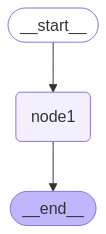

In [29]:
Image(compiled_graph.get_graph().draw_mermaid_png())

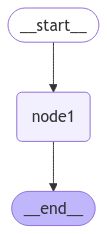

In [30]:
compiled_graph

In [31]:
compiled_graph.invoke({"attribute1": "Initial value",
                       "attribute2": "Initial value"})

{'attribute1': 'Value changed by node some_function()',
 'attribute2': 'Initial value'}